# Load libraries

In [3]:

import time

import numpy as np
import cv2 as cv
import glob


# Import libraries and modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from PIL import Image
import pathlib

from sklearn.model_selection import train_test_split

# For reproducibility
np.random.seed(42)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.applications.mobilenet_v2 import  MobileNetV2
import os
import glob
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')




# Setup

We are going to use MobilenetV2 finetuned version for image detection using webcam 

In [4]:
# Recreate VGG Model
MobileNet = tf.keras.models.load_model('../models/unfrozen_mobilenet_finetuned.h5')

In [5]:
# Recreate VGG Model
VGG16 = tf.keras.models.load_model('../models/VGG_model_finetuned.h5')

In [6]:
train_path = '../data/dataset_unbalanced/train/'
test_path = '../data/dataset_unbalanced/val/'

In [7]:
folders = glob.glob(train_path + '*')

train_list = pd.DataFrame(glob.glob(train_path + '*')).rename(columns = {0: 'name'})

train_list
# generate ordinal categories for y

train_list['class_name'] = train_list.name.apply(lambda x: x.split("\\")[1])

classes = train_list['class_name'].unique().tolist()
print(f'Number of classes: {len(classes)}')

Number of classes: 22


In [8]:
# Defining a function to return the image filepath with a new filename.
# If INPUT filepath is "my_folder1/my_folder2/my_image.jpg", OUTPUT filepath will be "my_folder1/my_folder2/my_image_WITH_AGE.jpg"

def new_img_name(org_img_path):
    img_path, img_name_ext = os.path.split(org_img_path)
    img_name, img_ext = os.path.splitext(img_name_ext)

    new_img_name_ext = img_name+"_with_VegeName"+img_ext
    new_img_path = os.path.join(img_path, new_img_name_ext)

    return new_img_path

In [9]:
def classify_vege(frame):

        #Convert the captured frame into RGB
        imageRGB = cv.cvtColor(frame, cv.COLOR_BGR2RGB)

        im = Image.fromarray(imageRGB)

        #Resizing into dimensions you used while training
        im = im.resize((224,224))
        img_array = np.array(im) / 255

        #Expand dimensions to match the 4D Tensor shape.
        img_array = np.expand_dims(img_array, axis=0)

        # Defining font, scales and thickness.
        fontFace = cv.FONT_HERSHEY_SIMPLEX
        text_scale = 0.5

        text = f'Top Prediction: {classes[np.argsort(np.max(MobileNet.predict(img_array), axis=0))[-1]]}, Probability: {round(np.sort(MobileNet.predict(img_array))[0][-1]*100,2)}%'
        text2 = f'2nd Prediction: {classes[np.argsort(np.max(MobileNet.predict(img_array), axis=0))[-2]]}, Probability: {round(np.sort(MobileNet.predict(img_array))[0][-2]*100,2)}%'
        text3 = f'3rd Prediction: {classes[np.argsort(np.max(MobileNet.predict(img_array), axis=0))[-3]]}, Probability: {round(np.sort(MobileNet.predict(img_array))[0][-3]*100,2)}%'
        vege_text_1 = cv.putText(frame, text, org=(0,30), fontFace=fontFace , fontScale=text_scale, thickness=2, color=(255, 255 , 255), lineType=cv.LINE_AA)
        vege_text_2 = cv.putText(frame, text2, org=(0,60), fontFace=fontFace , fontScale=text_scale, thickness=2, color=(255, 255 , 255), lineType=cv.LINE_AA)
        vege_text_3 = cv.putText(frame, text3, org=(0,90), fontFace=fontFace , fontScale=text_scale, thickness=2, color=(255, 255 , 255), lineType=cv.LINE_AA)

        return frame
        

In [32]:
def plot_image(dir):
    img_arr=cv.imread(dir)
    img_arr = cv.cvtColor(img_arr, cv.COLOR_BGR2RGB)
    img_arr=img_arr/255
    img_arr=cv.resize(img_arr, (224,224))
    plt.imshow(img_arr)
    plt.axis('off')
    plt.show()

In [228]:
def classify_vege_centered(frame):

        #Convert the captured frame into RGB
        imageRGB = cv.cvtColor(frame, cv.COLOR_BGR2RGB)

        im = Image.fromarray(imageRGB)

        #Resizing into dimensions you used while training
        im = im.resize((224,224))
        img_array = np.array(im) / 255

        #Expand dimensions to match the 4D Tensor shape.
        img_array = np.expand_dims(img_array, axis=0)

        # Defining font, scales and thickness.
        fontFace = cv.FONT_HERSHEY_SIMPLEX
        text_scale = 0.8

        colour = (0,0,255)
        text = f'Top Prediction: {classes[np.argsort(np.max(MobileNet.predict(img_array), axis=0))[-1]]}, Probability: {round(np.sort(MobileNet.predict(img_array))[0][-1]*100,2)}%'
        text2 = f'2nd Prediction: {classes[np.argsort(np.max(MobileNet.predict(img_array), axis=0))[-2]]}, Probability: {round(np.sort(MobileNet.predict(img_array))[0][-2]*100,2)}%'
        text3 = f'3rd Prediction: {classes[np.argsort(np.max(MobileNet.predict(img_array), axis=0))[-3]]}, Probability: {round(np.sort(MobileNet.predict(img_array))[0][-3]*100,2)}%'
        vege_text_1 = cv.putText(frame, text, org=(900,900), fontFace=fontFace , fontScale=text_scale, thickness=2, color=colour, lineType=cv.LINE_AA)
        vege_text_2 = cv.putText(frame, text2, org=(900,950), fontFace=fontFace , fontScale=text_scale, thickness=2, color=colour, lineType=cv.LINE_AA)
        vege_text_3 = cv.putText(frame, text3, org=(900,1000), fontFace=fontFace , fontScale=text_scale, thickness=2, color=colour, lineType=cv.LINE_AA)

        top = str(classes[np.argsort(np.max(MobileNet.predict(img_array), axis=0))[-1]]).lower()
        
        return frame,top
        

In [28]:
dir_kailan = '../data/dataset/test/Kailan2.jpg'
img_arr=cv.imread(dir_kailan)
img_arr = cv.cvtColor(img_arr, cv.COLOR_BGR2RGB)
img_arr=img_arr/255
img_arr=cv.resize(img_arr, (224,224))
img_arr = img_arr.reshape(1,224,224,3)
str(classes[np.argsort(np.max(MobileNet.predict(img_arr), axis=0))[-1]]).lower()

'kailan'

In [14]:
unique_vege_list = pd.read_csv('../logs/checkpoint/unique_vegetable_list.csv')[['Name','dir']]

In [ ]:
def get_ImageArray(name):
    dir = unique_vege_list[unique_vege_list['Name'] == name].dir.values[0]
    img_arr=cv.imread(dir)
    img_arr=cv.resize(img_arr, (224,224))
    return img_arr

## Vegetable classifier on Image

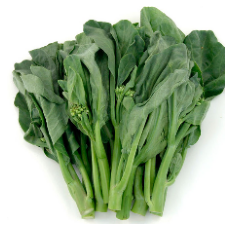

In [22]:
plot_image('../data/dataset/test/Kailan2.jpg')

In [ ]:
# Provide the image filepath as a string below.
# For example: "my_image.jpg" or "/content/drive/My Drive/my_folder/my_image.png"

my_image = "../data/dataset/test/baby_kailan_unseen.jpg"

In [ ]:
# Reading the image from filepath provided above and passing it through the age clasification method defined above.

img = cv.imread(my_image)
vege_img = classify_vege(img)

# Saving the new generated image with a new name at the same location. 
try:
    new_my_image = new_img_name(my_image)
    cv.imwrite(new_my_image, vege_img)
    print(f"Saved to {new_my_image}")
except:
    print("Error: Could not save image!")

cv.imshow("Vegetable on Image", vege_img)
cv.waitKey(10);

Saved to ../data/dataset/test\baby_kailan_unseen_with_VegeName.jpg


# Vegetable Classifier on Video


We will be using live webcame video

In [213]:
cap = cv.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera.")
else:
    print("Camera is operational.")

#exit()

ret = cap.set(cv.CAP_PROP_FRAME_WIDTH,1920)
ret = cap.set(cv.CAP_PROP_FRAME_HEIGHT,1080)
ret = cap.set(cv.CAP_PROP_FPS,10)

fps = cap.get(cv.CAP_PROP_FPS)
width  = cap.get(cv.CAP_PROP_FRAME_WIDTH)   # float
height = cap.get(cv.CAP_PROP_FRAME_HEIGHT)  # float

print(fps, width, height)

Camera is operational.
10.0 1920.0 1080.0


In [227]:
fourcc = cv.VideoWriter_fourcc('m', 'p', '4', 'v')
out = cv.VideoWriter('../video/output.avi', fourcc, fps, (int(width), int(height)))


time.sleep(2)

while True:
        _, frame = cap.read()

        #Convert the captured frame into RGB
        imageRGB = cv.cvtColor(frame, cv.COLOR_BGR2RGB)

        im = Image.fromarray(imageRGB)

        #Resizing into dimensions you used while training
        im = im.resize((224,224))
        img_array = np.array(im) / 255

        #Expand dimensions to match the 4D Tensor shape.
        img_array = np.expand_dims(img_array, axis=0)

        # To classify and label in video live, and get top prediction string 
        vege_img, top = classify_vege_centered(frame)

        # get image array for top prediction image 
        top_image = get_ImageArray(top)

        # overlay predicted image in frame
        frame_h, frame_w, frame_c = frame.shape
        overlay = np.zeros((frame_h, frame_w, 3), dtype = 'uint8')
        top_image_h, top_image_w, top_image_c = top_image.shape
        for i in range(0, top_image_h):
                for j in range(0, top_image_w):
                        if top_image[i, j][2] != 0:
                                overlay[i + 800, j + 600] = top_image[i,j]


        # add weight to add picture in
        frame2 = cv.addWeighted(overlay, 1,frame, 1, 0, frame)
        
        # Saving frame to output video using the VideoWriter object defined above.
        out.write(vege_img)

        cv.imshow("Prediction", frame)
        
        key=cv.waitKey(1)
        if key == ord('q'):
                break
cv.destroyAllWindows()

In [212]:
cap.release()

out.release()

cv.destroyAllWindows()

# Conclusion and Recommendation/Future-work

Specific only to deployment using `LIVE Video`, this model can deployed and tested on real unseen data. In the meantime, more efforts can be spent on expanding dataset with cleaner pictures perhaps from cloud spaces.

To cater for wrong classfications or missing classes, 
- We can venture into deploying an option for users to input if they dont think top predicted image matches what the model takes in from the unseen data.
    - More effort to look into these images and classify them accordingly 
- Video to autosave and used as file that helps to learn new data through `video classifier`, and we can look into including these images for certain classes (new or refined cleaner classes). 
    - We can zoom into those classes that has less defining probabilities between the top and 2nd predictions. 
